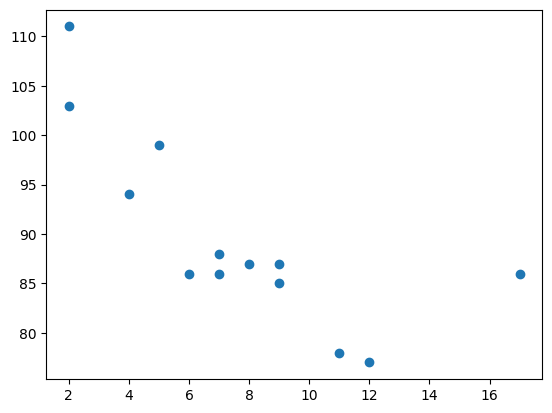

In [2]:
import matplotlib.pyplot as plt
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

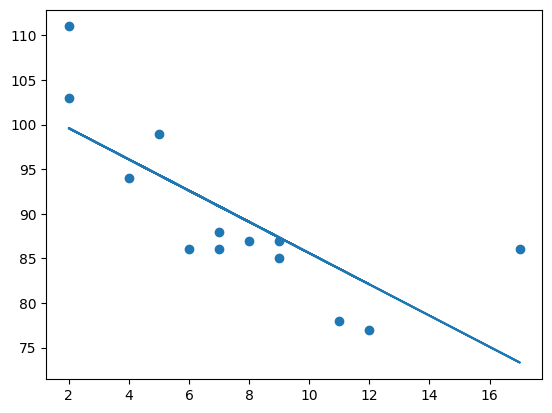

In [3]:
from scipy import stats
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_2636\1150752203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


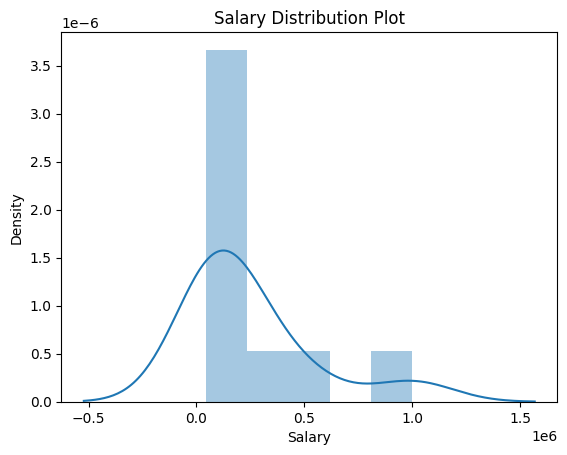

In [4]:
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

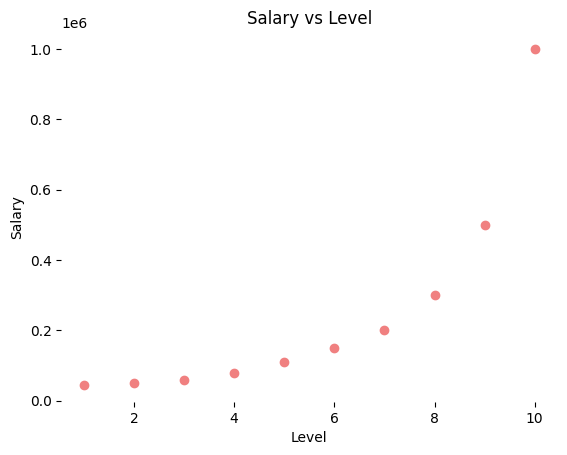

In [5]:
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [6]:
X = df_sal.iloc[:, 1:-1].values  # independent
y = df_sal.iloc[:, -1].values  # dependent
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
lr = LinearRegression()
lr.fit(X, y)

# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [8]:
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

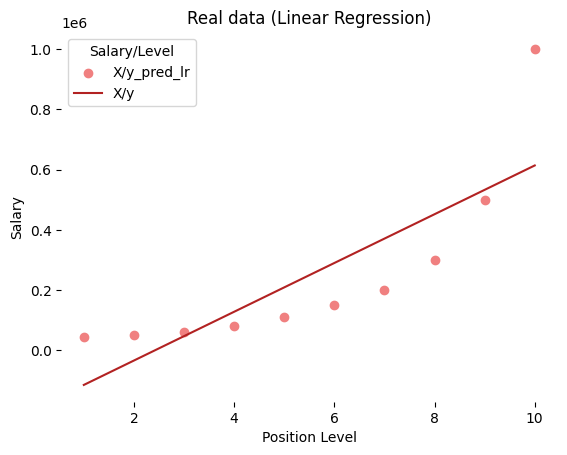

In [9]:
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

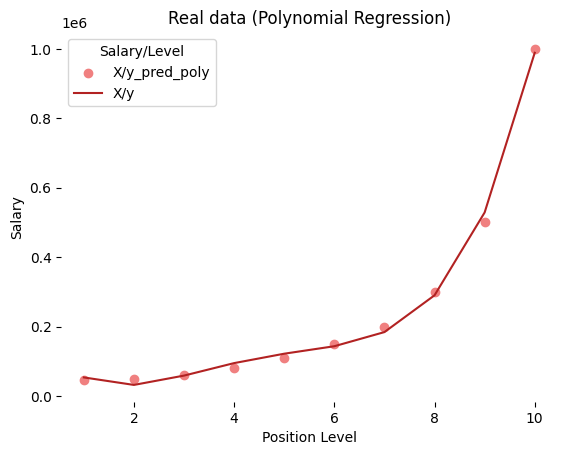

In [14]:
# Visualize real data with polynomial regression

plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [11]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[7.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[7.5]]))}')

Linear Regression result : [411257.57575758]
Polynomial Regression result : [225126.29297787]
